In [1]:
import pandas as pd
import numpy as np
import datetime

import pyaf.ForecastEngine as autof

%matplotlib inline

In [2]:
df = pd.read_csv('http://www.mechanicalkern.com/static/birthdates-1968-1988.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 6 columns):
year           7305 non-null int64
month          7305 non-null int64
day            7305 non-null int64
births         7305 non-null int64
day_of_year    7305 non-null int64
day_of_week    7305 non-null int64
dtypes: int64(6)
memory usage: 342.5 KB


In [4]:
df.head()

,year,month,day,births,day_of_year,day_of_week
0,1969,1,1,8486,1,3
1,1969,1,2,9002,2,4
2,1969,1,3,9542,3,5
3,1969,1,4,8960,4,6
4,1969,1,5,8390,5,7


In [5]:
df['date_str'] = df[['year', 'month', 'day']].apply(lambda r : str(r[0]) + "-" + str(r[1]) + "-" + str(r[2]) , axis = 1) 

df['date'] = df['date_str'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

In [6]:
lEngine = autof.cForecastEngine()
lEngine

H = 31;
lEngine.train(df , 'date' , 'births', H);
lEngine.getModelInfo();


INFO:pyaf.std:START_TRAINING 'births'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'births' 33.15265130996704
INFO:pyaf.std:TIME_DETAIL TimeVariable='date' TimeMin=1969-01-01T00:00:00.000000 TimeMax=1984-12-06T00:00:00.000000 TimeDelta=1 days Estimation = (0 , 5819) Validation = (5819 , 7274) Test = (7274 , 7305) Horizon=31
INFO:pyaf.std:SIGNAL_DETAIL SignalVariable='_births' Min=6675 Max=12851  Mean=9648.94017796 StdDev=1127.2380662
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_births_ConstantTrend_residue_zeroCycle_residue_AR(64)' [ConstantTrend + NoCycle + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_births_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_births_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_births_ConstantTrend_residue_zeroCycle_residue_AR(64)' [AR(64)]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0211 MAPE_Forecast=0.0243 MAPE_Test=0.0338
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0209 SMAPE_Forecast=0.024 SMAPE_Test

INFO:pyaf.std:START_PLOTTING
/home/antoine/dev/python/packages/pyaf/TS/Plots.py:31: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/anto

/home/antoine/dev/python/packages/pyaf/TS/Plots.py:107: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/antoine/.local/lib/python3.6/sit

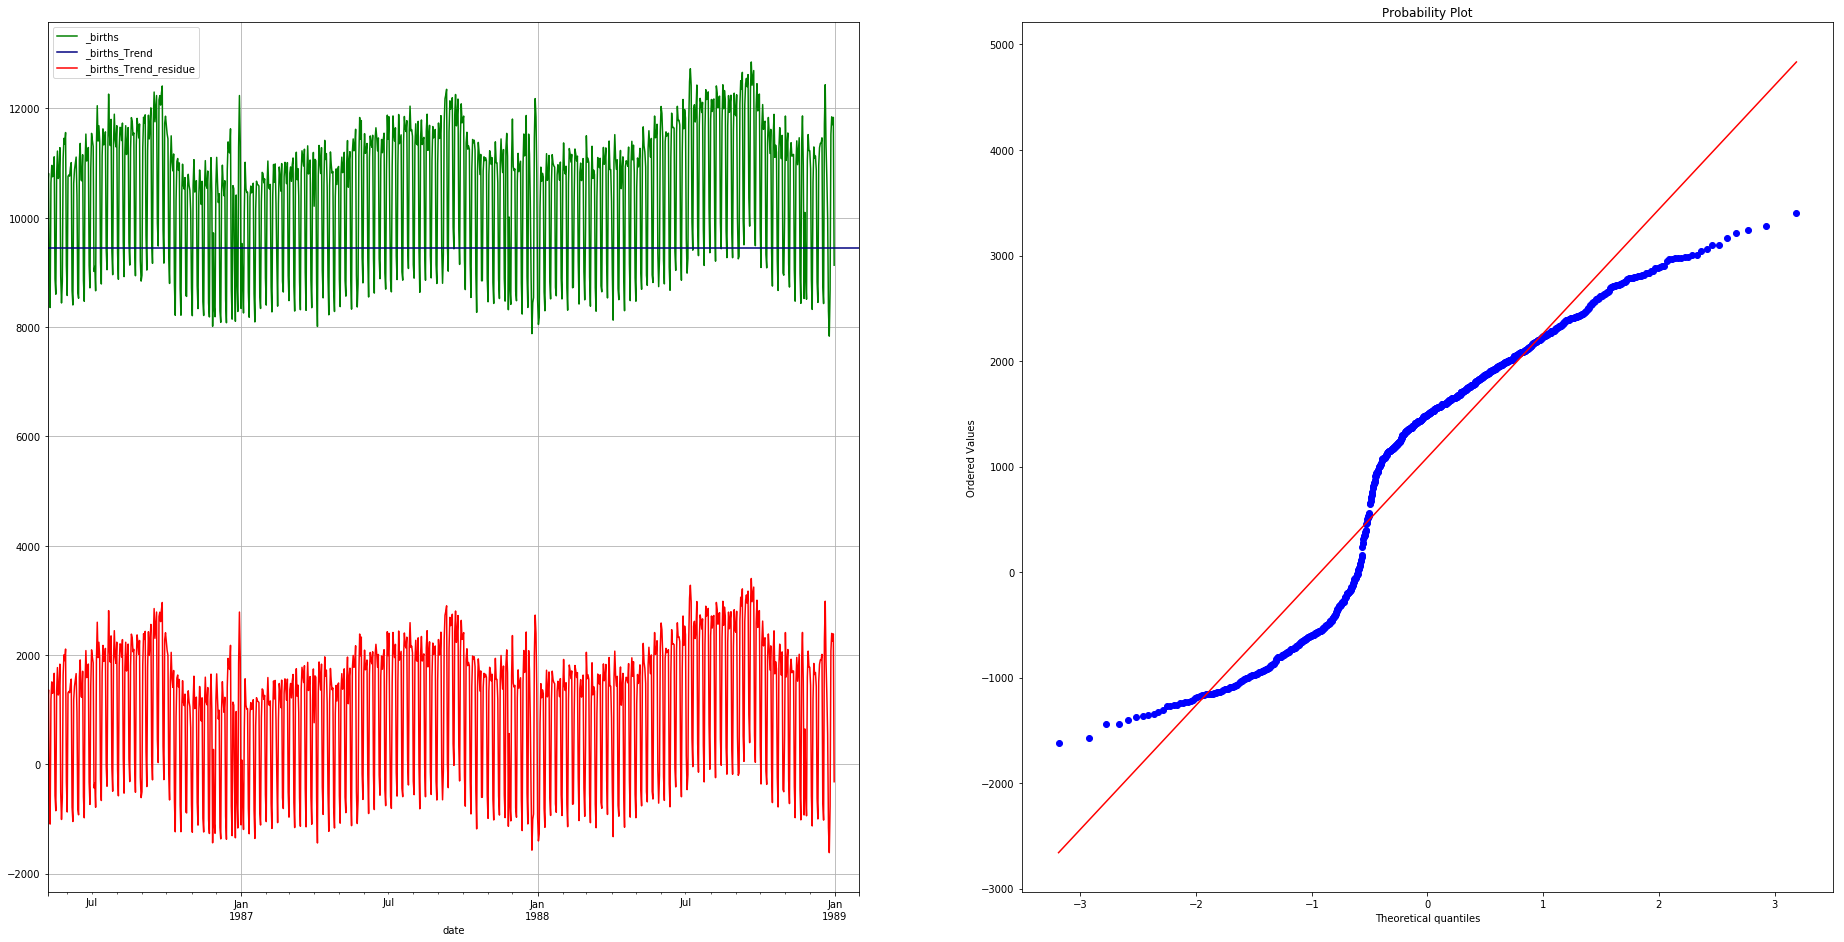

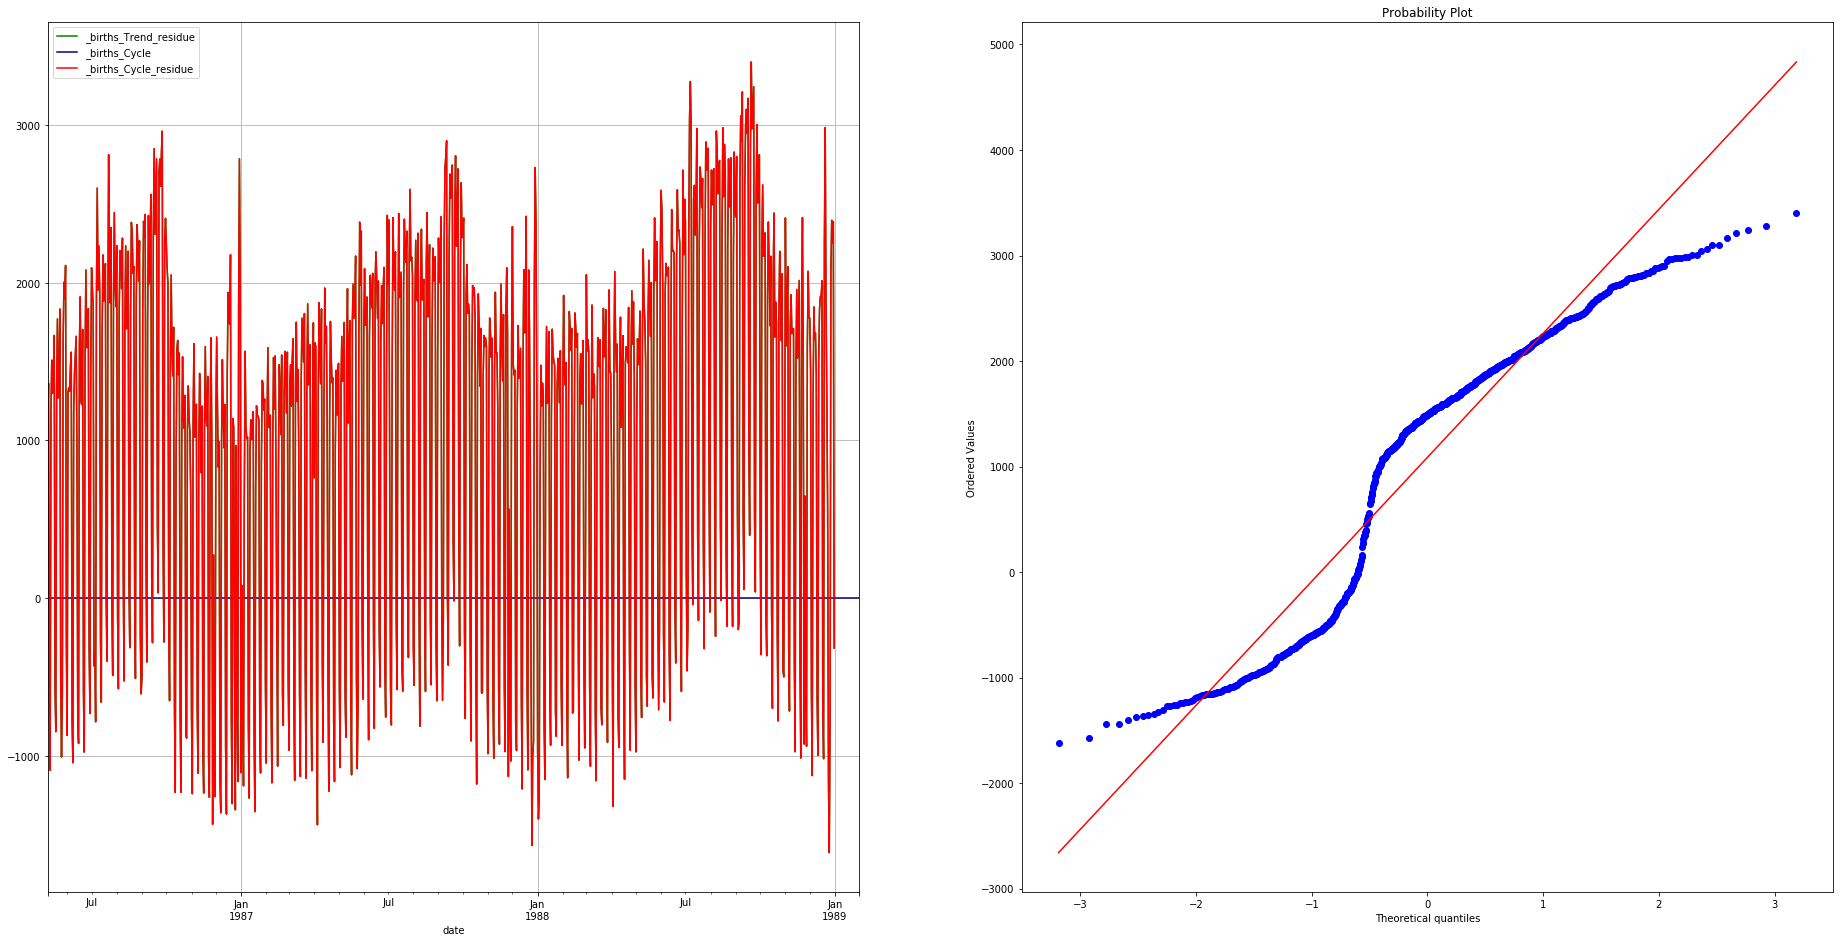

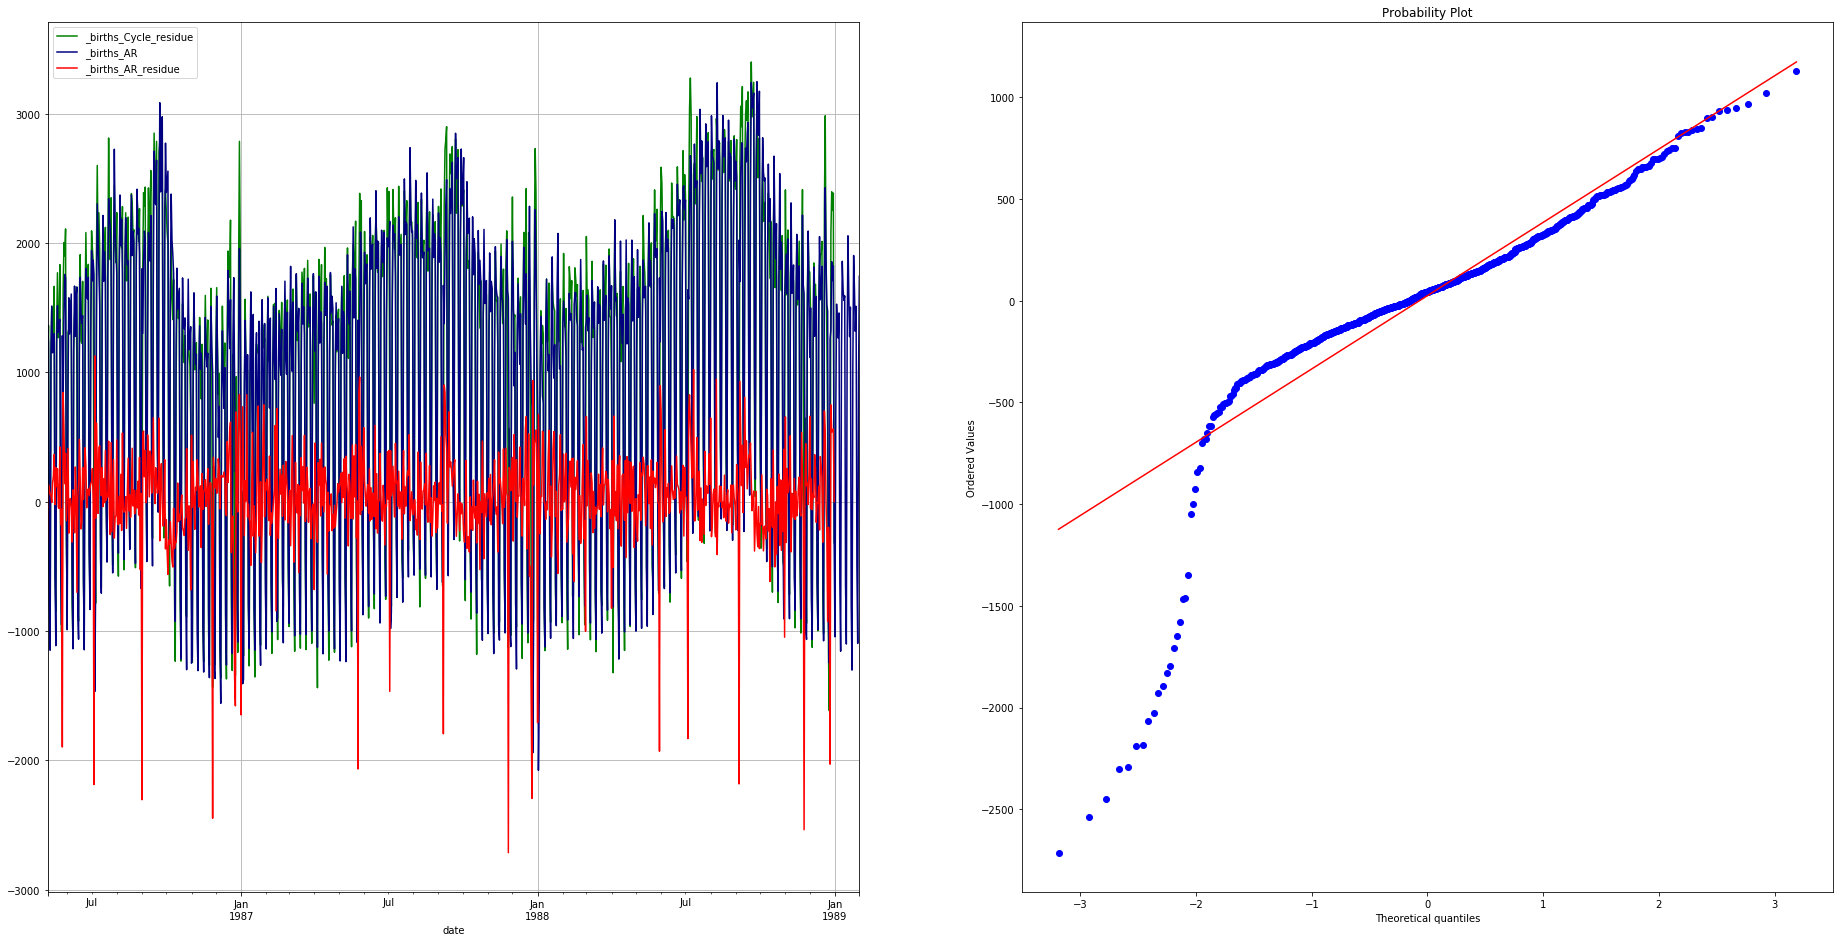

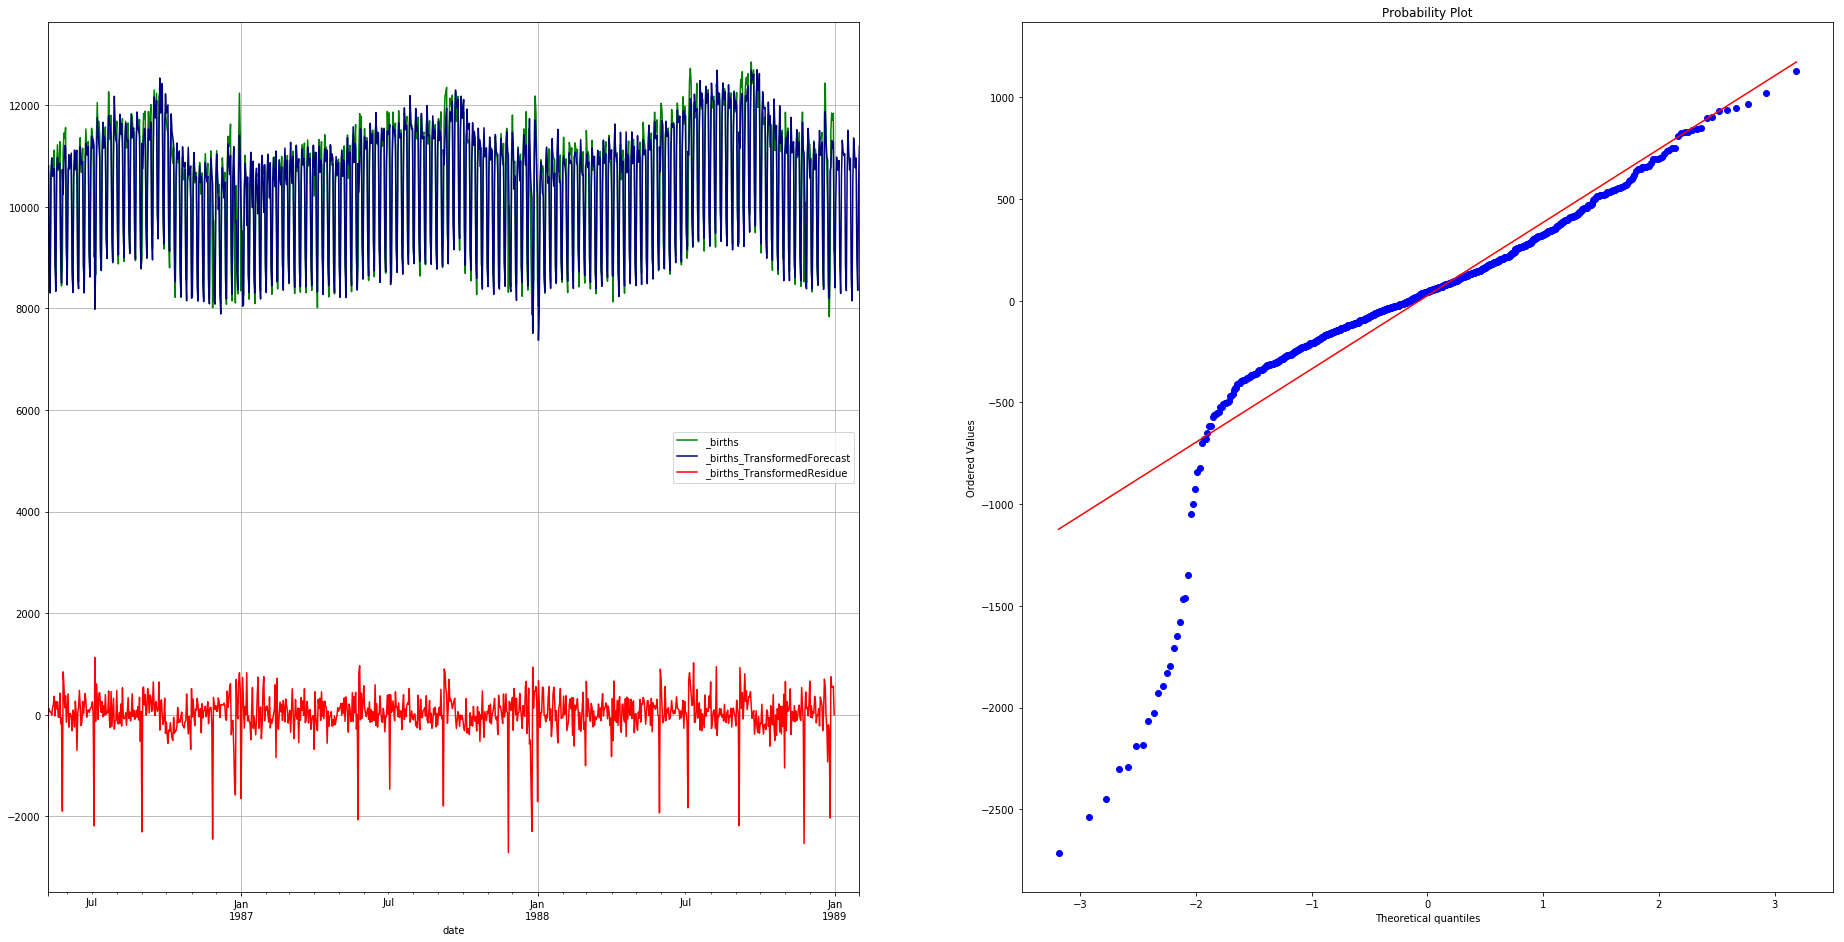

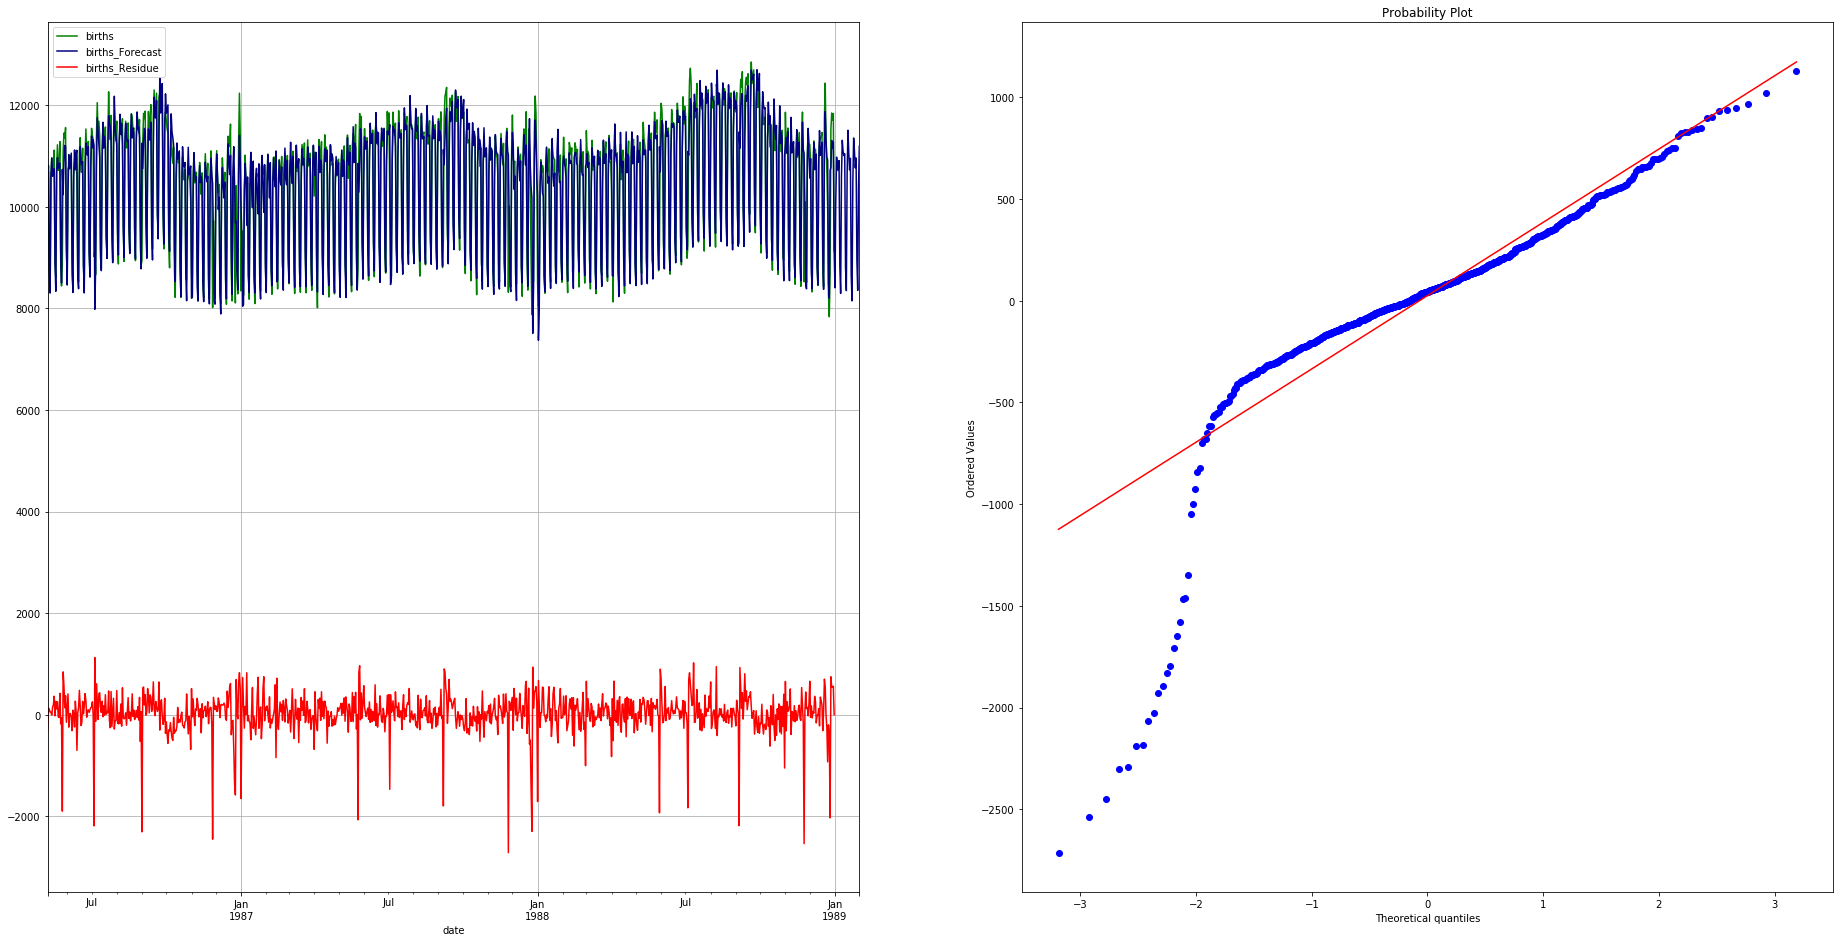

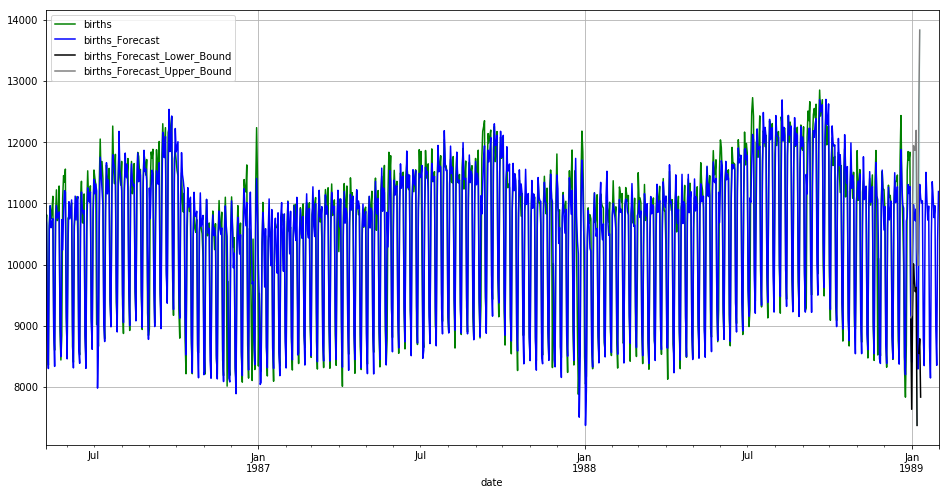

In [7]:
lEngine.standardPlots()

In [8]:
dfapp_out = lEngine.forecast(df, H);
#dfapp_out.to_csv("births.csv")
dfapp_out.tail(2 * H)


INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 14.801409721374512


,_births,births,date,row_number,date_Normalized,_births_ConstantTrend,_births_ConstantTrend_residue,_births_ConstantTrend_residue_zeroCycle,_births_ConstantTrend_residue_zeroCycle_residue,_births_ConstantTrend_residue_zeroCycle_residue_AR(64),...,_births_Cycle,_births_Cycle_residue,_births_AR,_births_AR_residue,_births_TransformedForecast,births_Forecast,_births_TransformedResidue,births_Residue,births_Forecast_Lower_Bound,births_Forecast_Upper_Bound
7274,11227.0,11227.0,1988-12-01,7274,1.250258,9449.814057,1777.185943,0.0,1777.185943,1116.078624,...,0.0,1777.185943,1116.078624,661.107319,10565.892681,10565.892681,661.107319,661.107319,NaN,NaN
7275,10899.0,10899.0,1988-12-02,7275,1.250430,9449.814057,1449.185943,0.0,1449.185943,1499.145440,...,0.0,1449.185943,1499.145440,-49.959497,10948.959497,10948.959497,-49.959497,-49.959497,NaN,NaN
7276,8870.0,8870.0,1988-12-03,7276,1.250602,9449.814057,-579.814057,0.0,-579.814057,-757.067027,...,0.0,-579.814057,-757.067027,177.252969,8692.747031,8692.747031,177.252969,177.252969,NaN,NaN
7277,8324.0,8324.0,1988-12-04,7277,1.250773,9449.814057,-1125.814057,0.0,-1125.814057,-1064.678738,...,0.0,-1125.814057,-1064.678738,-61.135319,8385.135319,8385.135319,-61.135319,-61.135319,NaN,NaN
7278,10651.0,10651.0,1988-12-05,7278,1.250945,9449.814057,1201.185943,0.0,1201.185943,1137.690845,...,0.0,1201.185943,1137.690845,63.495097,10587.504903,10587.504903,63.495097,63.495097,NaN,NaN
7279,11297.0,11297.0,1988-12-06,7279,1.251117,9449.814057,1847.185943,0.0,1847.185943,1814.413711,...,0.0,1847.185943,1814.413711,32.772232,11264.227768,11264.227768,32.772232,32.772232,NaN,NaN
7280,11095.0,11095.0,1988-12-07,7280,1.251289,9449.814057,1645.185943,0.0,1645.185943,1279.868191,...,0.0,1645.185943,1279.868191,365.317752,10729.682248,10729.682248,365.317752,365.317752,NaN,NaN
7281,11131.0,11131.0,1988-12-08,7281,1.251461,9449.814057,1681.185943,0.0,1681.185943,1418.227348,...,0.0,1681.185943,1418.227348,262.958595,10868.041405,10868.041405,262.958595,262.958595,NaN,NaN
7282,10878.0,10878.0,1988-12-09,7282,1.251633,9449.814057,1428.185943,0.0,1428.185943,1587.522525,...,0.0,1428.185943,1587.522525,-159.336583,11037.336583,11037.336583,-159.336583,-159.336583,NaN,NaN
7283,8825.0,8825.0,1988-12-10,7283,1.251805,9449.814057,-624.814057,0.0,-624.814057,-614.465444,...,0.0,-624.814057,-614.465444,-10.348614,8835.348614,8835.348614,-10.348614,-10.348614,NaN,NaN
